In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import tifffile
#%matplotlib notebook Use it in case you need interactive figures

In [18]:
files = ['B51_bag02.tif' , 'B51_bag40.tif' , 'B51_bag80.tif' , 'B51_bag120.tif']
file_number = 3
input_path = './'
img = tifffile.imread(
    input_path+files [file_number])

print (img.shape)

(8721, 1008, 1008)


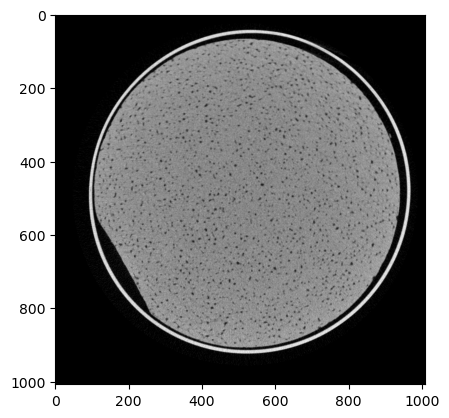

In [22]:
plt.imshow(img[1000], 'gray')

In [20]:
def remove_casing (img,threshold, epsilon):

    
    #Threshholding 
    ret,thresh = cv.threshold(img,threshold,1,cv.THRESH_BINARY)
    
    # Finding contours for the thresholded image
    contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)

    contour = contours[0] #biggest outside contour
    #cnt_draw = cv.cvtColor(img,cv.COLOR_GRAY2RGB) only for visulization on color 
    mask = np.zeros_like(img)
    
    #Step_2 removing the Casing
    polygon = Polygon(contour[:, 0, :])

    # Compute offset
    offset_polygon = polygon.buffer(-epsilon)

    # Convert offset polygon to numpy array and draw on image
    points = np.array(offset_polygon.exterior.coords)
    points = np.expand_dims(points.astype(np.int32), axis=1)
    
    cv.drawContours(mask, [points], -1, 100, -1 )
    
    #filtering
    output = img.copy()
    output[mask == 0] = 0

    
    return output, mask

    

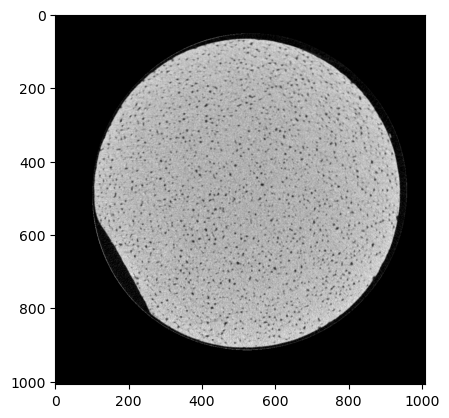

In [28]:
# Here you can check different 
removed,_ = remove_casing(img[1000], 120, 9)
plt.imshow(removed, 'gray')

In [23]:
new_img = np.zeros_like(img)
epsilon = 10
threshold = 120
for i in range (img.shape[0]):
    try:
        new_img[i],_ = remove_casing(img[i],threshold = threshold, epsilon = epsilon)
    except:
        _,mask = remove_casing(img[i-1],threshold = threshold, epsilon = epsilon)
        new_img[i] = img[i]
        new_img[i] [mask == 0] = 0
        print ('Error occured on  ',i)
        
    print (i, end='\r')

In [24]:
output_path = './/output'
tifffile.imwrite(output_path+files [file_number]
                ,new_img)


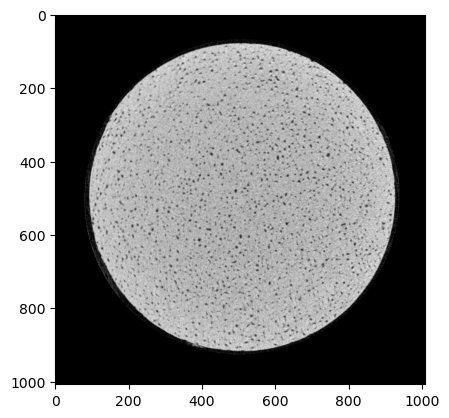

In [25]:
plt.imshow(new_img[-1000], 'gray')